# Reading csv

In [ ]:
import pandas as pd
df = pd.read_csv('home_energy_data.csv')
print(df.head())



              datetime  Appliances     lights         T1       RH_1  \
0  2020-11-20 06:36:00    9.224074  11.780934  21.353076  28.785449   
1  2020-03-13 20:22:00   39.255901  60.716264  35.487458  41.356428   
2  2022-03-12 01:56:00   35.940710  65.406471  47.017619  63.418386   
3  2021-12-14 07:10:00   41.084820  86.065163  23.978005  23.393887   
4  2021-10-12 03:33:00   16.906166  10.180642  36.304494  66.095897   

          T2       RH_2         T3       RH_3         T4  ...        T9  \
0   6.129020  27.960747  15.348167  28.330292   4.154281  ...  5.923630   
1  15.903235  20.507539  27.672137  22.920486  12.124937  ...  6.061692   
2  13.095685  54.531559  34.191016  61.558161   7.795195  ...  6.447738   
3   9.435890  26.694852  16.212792  17.039071   4.614822  ...  5.286256   
4   2.251706  51.922185  27.846892  66.290309   0.794317  ...  1.668838   

        RH_9      T_out    Pressure     RH_out  Windspeed  Visibility  \
0  28.311018  11.236204  709.237084  39.363552   

## Checking for missing values

In [ ]:
print(df.isnull().values.any())

False


## Checking for outliers

In [ ]:
import pandas as pd
import numpy as np

def has_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return any((df[col] < lower_bound) | (df[col] > upper_bound))

for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]): # check if column is numeric
    if has_outliers(df, col):
      print(f"Column '{col}' has outliers.")

Column 'T4' has outliers.
Column 'T5' has outliers.
Column 'T6' has outliers.
Column 'T9' has outliers.


# Calculating average of Appliances column

In [ ]:
# prompt: calculate average of Appliances column

print(f"Average of Appliances column: {df['Appliances'].mean()}")

Average of Appliances column: 30.341510420861812


# Converting Appliances column in classes

In [ ]:
df['Appliances'] = np.where(df['Appliances'] > 30, 'high', 'low')

print(df.head())

              datetime Appliances     lights         T1       RH_1         T2  \
0  2020-11-20 06:36:00        low  11.780934  21.353076  28.785449   6.129020   
1  2020-03-13 20:22:00       high  60.716264  35.487458  41.356428  15.903235   
2  2022-03-12 01:56:00       high  65.406471  47.017619  63.418386  13.095685   
3  2021-12-14 07:10:00       high  86.065163  23.978005  23.393887   9.435890   
4  2021-10-12 03:33:00        low  10.180642  36.304494  66.095897   2.251706   

        RH_2         T3       RH_3         T4  ...        T9       RH_9  \
0  27.960747  15.348167  28.330292   4.154281  ...  5.923630  28.311018   
1  20.507539  27.672137  22.920486  12.124937  ...  6.061692  27.481087   
2  54.531559  34.191016  61.558161   7.795195  ...  6.447738  38.750060   
3  26.694852  16.212792  17.039071   4.614822  ...  5.286256   1.012943   
4  51.922185  27.846892  66.290309   0.794317  ...  1.668838  39.741581   

       T_out    Pressure     RH_out  Windspeed  Visibility  Td

# Dropping datetime, rv1 and rv2

In [ ]:
df = df.drop(['datetime', 'rv1', 'rv2'], axis=1, errors='ignore')
print(df.head())

  Appliances     lights         T1       RH_1         T2       RH_2  \
0        low  11.780934  21.353076  28.785449   6.129020  27.960747   
1       high  60.716264  35.487458  41.356428  15.903235  20.507539   
2       high  65.406471  47.017619  63.418386  13.095685  54.531559   
3       high  86.065163  23.978005  23.393887   9.435890  26.694852   
4        low  10.180642  36.304494  66.095897   2.251706  51.922185   

          T3       RH_3         T4       RH_4  ...         T8       RH_8  \
0  15.348167  28.330292   4.154281  10.516710  ...   5.080271  17.303610   
1  27.672137  22.920486  12.124937  15.332914  ...  17.414417  22.810967   
2  34.191016  61.558161   7.795195  37.133818  ...  12.687376  34.153399   
3  16.212792  17.039071   4.614822  15.888899  ...  11.876056   9.455302   
4  27.846892  66.290309   0.794317  42.855128  ...   2.018645  30.325235   

         T9       RH_9      T_out    Pressure     RH_out  Windspeed  \
0  5.923630  28.311018  11.236204  709.237084

# Normalizing numerical columns

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
print(df.head())

  Appliances    lights        T1      RH_1        T2      RH_2        T3  \
0        low  0.117800  0.385667  0.427057  0.415540  0.477257  0.358687   
1       high  0.607222  0.615161  0.561159  0.920887  0.392103  0.644814   
2       high  0.654131  0.802371  0.796507  0.775731  0.780835  0.796163   
3       high  0.860747  0.428286  0.369542  0.586512  0.462794  0.378761   
4        low  0.101795  0.628426  0.825070  0.215075  0.751022  0.648871   

       RH_3        T4      RH_4  ...        T8      RH_8        T9      RH_9  \
0  0.448773  0.503577  0.268733  ...  0.330525  0.459134  0.554378  0.531894   
1  0.389608  0.925015  0.330983  ...  0.891079  0.544002  0.560436  0.521397   
2  0.812170  0.696085  0.612765  ...  0.676248  0.718789  0.577378  0.663927   
3  0.325286  0.527927  0.338169  ...  0.639376  0.338192  0.526407  0.186627   
4  0.863924  0.325923  0.686715  ...  0.191383  0.659797  0.367659  0.676468   

      T_out  Pressure    RH_out  Windspeed  Visibility  Tdewpo

# Encoding Apliances column

In [ ]:
df['Appliances'] = df['Appliances'].map({'high': 1, 'low': 0})

print(df.head())

   Appliances    lights        T1      RH_1        T2      RH_2        T3  \
0           0  0.117800  0.385667  0.427057  0.415540  0.477257  0.358687   
1           1  0.607222  0.615161  0.561159  0.920887  0.392103  0.644814   
2           1  0.654131  0.802371  0.796507  0.775731  0.780835  0.796163   
3           1  0.860747  0.428286  0.369542  0.586512  0.462794  0.378761   
4           0  0.101795  0.628426  0.825070  0.215075  0.751022  0.648871   

       RH_3        T4      RH_4  ...        T8      RH_8        T9      RH_9  \
0  0.448773  0.503577  0.268733  ...  0.330525  0.459134  0.554378  0.531894   
1  0.389608  0.925015  0.330983  ...  0.891079  0.544002  0.560436  0.521397   
2  0.812170  0.696085  0.612765  ...  0.676248  0.718789  0.577378  0.663927   
3  0.325286  0.527927  0.338169  ...  0.639376  0.338192  0.526407  0.186627   
4  0.863924  0.325923  0.686715  ...  0.191383  0.659797  0.367659  0.676468   

      T_out  Pressure    RH_out  Windspeed  Visibility  

# Counting records in each class of Appliances

In [ ]:
import pandas as pd
import numpy as np

print(df['Appliances'].value_counts())

Appliances
1    2508
0    2492
Name: count, dtype: int64


# Pearson correlation

In [ ]:
correlations = df.corr()['Appliances']
selected_features = correlations[abs(correlations) > 0.1].index  # Get column names, not values
selected_features = selected_features.drop('Appliances', errors='ignore')
selected_features



Index(['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'T_out'],
      dtype='object')

# Forward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df[selected_features]  # Exclude the target column from features
y = df['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform forward selection
sfs = SequentialFeatureSelector(logreg, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)

# Fit the selector on the training data
sfs.fit(X_train, y_train)

# Get the selected feature names
selected_features_forward = X_train.columns[sfs.get_support()]

# Print selected features
print("Selected features using forward selection:", selected_features_forward)

# Evaluate the model using the selected features
X_train_selected = X_train[selected_features_forward]
X_test_selected = X_test[selected_features_forward]

# Train the model with selected features
logreg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Selected features using forward selection: Index(['lights', 'T1', 'T7', 'T8', 'T_out'], dtype='object')
Accuracy with selected features: 0.9106666666666666


# Backward selection

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the feature set (X) and target (y)
X = df[selected_features]  # Features based on selected_features
y = df['Appliances']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Backward elimination based on accuracy
def backward_elimination_accuracy(X_train, y_train, X_test, y_test):
    features = X_train.columns
    best_accuracy = 0
    selected_features = features

    while len(features) > 0:
        accuracies = []
        # Test by removing one feature at a time and measuring accuracy
        for feature in features:
            features_subset = features.drop(feature)
            X_train_subset = X_train[features_subset]
            X_test_subset = X_test[features_subset]

            # Train the model
            logreg.fit(X_train_subset, y_train)
            y_pred = logreg.predict(X_test_subset)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append((feature, accuracy))

        # Find the feature whose removal results in the highest accuracy
        feature_to_remove, best_accuracy_new = max(accuracies, key=lambda x: x[1])

        # If the accuracy with the feature removed is better or equal, keep it
        if best_accuracy_new >= best_accuracy:
            best_accuracy = best_accuracy_new
            features = features.drop(feature_to_remove)
            selected_features = features
        else:
            break  # Stop if removing features decreases accuracy

    # Return the final selected features and accuracy
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    logreg.fit(X_train_selected, y_train)
    y_pred = logreg.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    return selected_features, accuracy

# Perform backward elimination based on accuracy
selected_features_backward, accuracy = backward_elimination_accuracy(X_train, y_train, X_test, y_test)

# Print selected features and accuracy
print("Selected features after backward elimination based on accuracy:", selected_features_backward)
print(f"Accuracy with selected features: {accuracy:.4f}")


Selected features after backward elimination based on accuracy: Index(['lights', 'T1', 'T3', 'T4', 'T7', 'T8', 'T9', 'T_out'], dtype='object')
Accuracy with selected features: 0.9140


# PSO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the feature set (X) and target (y)
X = df[selected_features]  # Features based on selected_features
y = df['Appliances']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define PSO parameters
n_particles = 30  # Number of particles
n_features = X_train.shape[1]  # Number of features
iterations = 50  # Number of PSO iterations
w = 0.5  # Inertia weight
c1 = 0.8  # Cognitive weight
c2 = 0.9  # Social weight

# Initialize particle positions and velocities
positions = np.random.randint(2, size=(n_particles, n_features))  # Binary positions (0 or 1) indicating feature selection
velocities = np.random.uniform(-1, 1, size=(n_particles, n_features))  # Particle velocities

# Initialize personal best positions and global best
personal_best_positions = positions.copy()
personal_best_scores = np.zeros(n_particles)  # Store personal best accuracy for each particle
global_best_position = positions[0].copy()
global_best_score = 0  # Store the best accuracy

# Fitness function: train logistic regression and return accuracy
def fitness_function(position):
    selected_features = X_train.columns[position == 1]  # Select features where position == 1
    if len(selected_features) == 0:
        return 0  # If no features are selected, return an accuracy of 0

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    logreg.fit(X_train_selected, y_train)
    y_pred = logreg.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# PSO Main Loop
for iteration in range(iterations):
    for i in range(n_particles):
        # Calculate fitness (accuracy) for each particle
        fitness = fitness_function(positions[i])

        # Update personal best if current fitness is better
        if fitness > personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = positions[i].copy()

        # Update global best if current fitness is better
        if fitness > global_best_score:
            global_best_score = fitness
            global_best_position = positions[i].copy()

    # Update particle velocities and positions
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        # Velocity update equation
        velocities[i] = w * velocities[i] + c1 * r1 * (personal_best_positions[i] - positions[i]) + c2 * r2 * (global_best_position - positions[i])

        # Update positions (binary)
        positions[i] = np.where(np.random.rand(n_features) < 1 / (1 + np.exp(-velocities[i])), 1, 0)

    # Print progress
    print(f"Iteration {iteration+1}/{iterations} - Best Accuracy: {global_best_score:.4f}")

# Final selected features from the global best position
selected_features_pso= X_train.columns[global_best_position == 1]
print("Selected Features after PSO:", selected_features_pso)
print(f"Best Accuracy with selected features: {global_best_score:.4f}")


Iteration 1/50 - Best Accuracy: 0.9133
Iteration 2/50 - Best Accuracy: 0.9140
Iteration 3/50 - Best Accuracy: 0.9140
Iteration 4/50 - Best Accuracy: 0.9140
Iteration 5/50 - Best Accuracy: 0.9140
Iteration 6/50 - Best Accuracy: 0.9140
Iteration 7/50 - Best Accuracy: 0.9147
Iteration 8/50 - Best Accuracy: 0.9147
Iteration 9/50 - Best Accuracy: 0.9147
Iteration 10/50 - Best Accuracy: 0.9147
Iteration 11/50 - Best Accuracy: 0.9147
Iteration 12/50 - Best Accuracy: 0.9147
Iteration 13/50 - Best Accuracy: 0.9147
Iteration 14/50 - Best Accuracy: 0.9147
Iteration 15/50 - Best Accuracy: 0.9147
Iteration 16/50 - Best Accuracy: 0.9147
Iteration 17/50 - Best Accuracy: 0.9147
Iteration 18/50 - Best Accuracy: 0.9147
Iteration 19/50 - Best Accuracy: 0.9147
Iteration 20/50 - Best Accuracy: 0.9147
Iteration 21/50 - Best Accuracy: 0.9147
Iteration 22/50 - Best Accuracy: 0.9147
Iteration 23/50 - Best Accuracy: 0.9147
Iteration 24/50 - Best Accuracy: 0.9147
Iteration 25/50 - Best Accuracy: 0.9147
Iteration

# Genetic algorithm

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Sample dataset
X = df[selected_features]  # Replace with your feature columns
y = df["Appliances"]  # Replace with your target column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitness function: Accuracy based on selected features
def evaluate(individual):
    selected_features = [bool(i) for i in individual]  # Convert 0/1 to True/False
    if not any(selected_features):
        return 0,  # Return 0 accuracy if no features are selected

    X_train_selected = X_train.loc[:, selected_features]
    X_test_selected = X_test.loc[:, selected_features]

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,  # Return as a tuple

# Genetic Algorithm setup
n_features = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)  # Binary 0/1 for each feature
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)  # Flip bit with 10% probability
toolbox.register("select", tools.selTournament, tournsize=3)

# Run Genetic Algorithm
population = toolbox.population(n=30)  # 30 individuals in population
n_generations = 50

result_population, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
                                             ngen=n_generations, verbose=True)

# Get the best individual (feature set)
best_individual = tools.selBest(result_population, k=1)[0]
selected_features = X_train.columns[[bool(i) for i in best_individual]]

print("Selected Features:", list(selected_features))


gen	nevals
0  	30    
1  	18    
2  	22    
3  	19    
4  	14    
5  	16    
6  	21    
7  	16    
8  	22    
9  	14    
10 	17    
11 	22    
12 	16    
13 	13    
14 	22    
15 	18    
16 	14    
17 	16    
18 	21    
19 	16    
20 	20    
21 	26    
22 	19    
23 	17    
24 	18    
25 	21    
26 	20    
27 	16    
28 	22    
29 	19    
30 	21    
31 	22    
32 	20    
33 	16    
34 	13    
35 	21    
36 	11    
37 	16    
38 	15    
39 	22    
40 	13    
41 	24    
42 	16    
43 	12    
44 	12    
45 	17    
46 	17    
47 	18    
48 	14    
49 	18    
50 	16    
Selected Features: ['lights', 'T1', 'T3', 'T7', 'T8']


# Logistic regression on Forward selected features

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T7', 'T8', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2']             # L1 (Lasso) and L2 (Ridge) penalties
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Logistic Regression model with the best parameters
optimal_logreg = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
optimal_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')        # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')                # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9127
Precision: 0.9093
Recall: 0.9106
F1 Score: 0.9100


# Naive bayes classifier(guassianNB) on Forward selected features

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T7', 'T8', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9013
Precision: 0.8982
Recall: 0.8982
F1 Score: 0.8982


# KNN on Forward selected features

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T7', 'T8', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV to find the best value of k (neighbors)
param_grid = {'n_neighbors': list(range(1, 10))}  # Testing k values from 1 to 20

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

# Train the KNN model with the best k value
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best value of k: 7
Accuracy: 0.9013
Precision: 0.9049
Recall: 0.8900
F1 Score: 0.8974


#  SVM on forward selected features

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T7', 'T8', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV, including 'sigmoid' kernel
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types including 'sigmoid'
    'gamma': ['scale', 'auto']       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVM model with the best parameters
optimal_svm = SVC(**best_params)
optimal_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9113
Precision: 0.9114
Recall: 0.9051
F1 Score: 0.9082


# Logistic regression on backward selected features

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T4', 'T7', 'T8', 'T9', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2']             # L1 (Lasso) and L2 (Ridge) penalties
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Logistic Regression model with the best parameters
optimal_logreg = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
optimal_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')        # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')                # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9133
Precision: 0.9095
Recall: 0.9120
F1 Score: 0.9107


# Naive bayes classifier on Backward selected features

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T4', 'T7', 'T8', 'T9', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9060
Precision: 0.9047
Recall: 0.9010
F1 Score: 0.9028


# KNN on backward selected features

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T4', 'T7', 'T8', 'T9', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV to find the best value of k (neighbors)
param_grid = {'n_neighbors': list(range(1, 10))}  # Testing k values from 1 to 20

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

# Train the KNN model with the best k value
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best value of k: 9
Accuracy: 0.9053
Precision: 0.9012
Recall: 0.9037
F1 Score: 0.9025


# SVM on backward selected features

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T4', 'T7', 'T8', 'T9', 'T_out']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV, including 'sigmoid' kernel
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types including 'sigmoid'
    'gamma': ['scale', 'auto']       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVM model with the best parameters
optimal_svm = SVC(**best_params)
optimal_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9147
Precision: 0.9108
Recall: 0.9133
F1 Score: 0.9121


# Logistic regression on features selected by PSO

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2']             # L1 (Lasso) and L2 (Ridge) penalties
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Logistic Regression model with the best parameters
optimal_logreg = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
optimal_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')        # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')                # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9140
Precision: 0.9130
Recall: 0.9092
F1 Score: 0.9111


# Naive bayes classifier on PSO selected features

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9093
Precision: 0.9065
Recall: 0.9065
F1 Score: 0.9065


# KNN on PSO selected features

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV to find the best value of k (neighbors)
param_grid = {'n_neighbors': list(range(1, 10))}  # Testing k values from 1 to 20

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

# Train the KNN model with the best k value
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best value of k: 5
Accuracy: 0.8940
Precision: 0.8890
Recall: 0.8927
F1 Score: 0.8909


# SVM on selected features by PSO

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV, including 'sigmoid' kernel
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types including 'sigmoid'
    'gamma': ['scale', 'auto']       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVM model with the best parameters
optimal_svm = SVC(**best_params)
optimal_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Accuracy: 0.9067
Precision: 0.9048
Recall: 0.9023
F1 Score: 0.9036


# Logistic regression on features selected by Genetic algorithm

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2']             # L1 (Lasso) and L2 (Ridge) penalties
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Logistic Regression model with the best parameters
optimal_logreg = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
optimal_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')        # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')                # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Best Parameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.9153
Precision: 0.9144
Recall: 0.9106
F1 Score: 0.9125


# Naive bayes classifier on features selected by Genetic algorithm

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9087
Precision: 0.9063
Recall: 0.9051
F1 Score: 0.9057


# KNN on features selected by GA

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV to find the best value of k (neighbors)
param_grid = {'n_neighbors': list(range(1, 10))}  # Testing k values from 1 to 20

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

# Train the KNN model with the best k value
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Best value of k: 9
Accuracy: 0.8987
Precision: 0.8976
Recall: 0.8927
F1 Score: 0.8952


# Svm on features selected by GA

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' with the relevant columns
# Replace 'df' with the actual DataFrame name or data loading process
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df[['lights', 'T1', 'T3', 'T7', 'T8']]
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV, including 'sigmoid' kernel
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types including 'sigmoid'
    'gamma': ['scale', 'auto']       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVM model with the best parameters
optimal_svm = SVC(**best_params)
optimal_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust for multi-class if needed

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9093
Precision: 0.9076
Recall: 0.9051
F1 Score: 0.9063


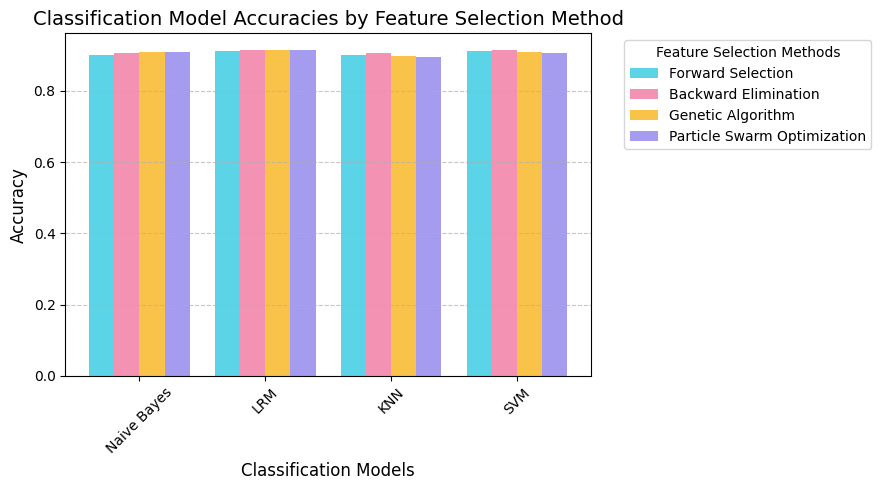

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Classification models
models = ['Naive Bayes', 'LRM', 'KNN', 'SVM']

# Feature selection methods with full names
methods = ['Forward Selection', 'Backward Elimination', 'Genetic Algorithm', 'Particle Swarm Optimization']

# Accuracy values provided
accuracies = np.array([
    [0.9013, 0.9060, 0.9087, 0.9093],  # Naive Bayes
    [0.9127, 0.9133, 0.9153, 0.9140],  # LRM
    [0.9013, 0.9053, 0.8987, 0.8940],  # KNN
    [0.9113, 0.9147, 0.9093, 0.9067],  # SVM
])

# Color palette
colors = ['#5AD4E6', '#F392B2', '#F9C349', '#A59BEF']

# Plot configuration
x = np.arange(len(models))  # Number of models
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(9, 5))  # Adjusted figure size

# Create bars for each method
for i, (method, color) in enumerate(zip(methods, colors)):
    ax.bar(x + i * width, accuracies[:, i], width, label=method, color=color)

# Labeling and aesthetics
ax.set_xlabel('Classification Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Classification Model Accuracies by Feature Selection Method', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Reposition legend outside the plot to the right
ax.legend(title='Feature Selection Methods', fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

plt.tight_layout()
plt.show()
